In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Rubelita


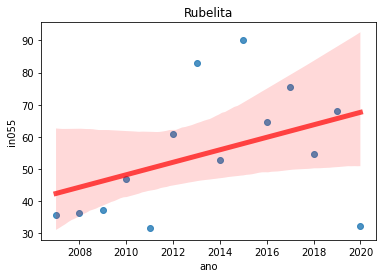

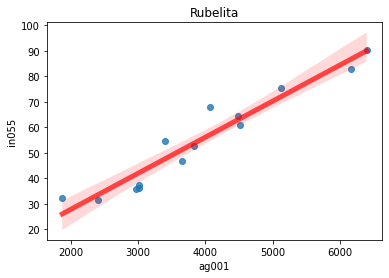

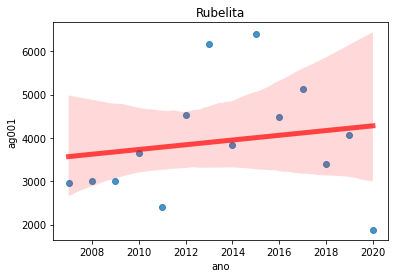

In [79]:
from matplotlib.pyplot import title


data = pd.ExcelFile("database.xlsx")
base_de_dados = pd.read_excel(data)

nome_mun = "Rubelita"
data_mun = base_de_dados.loc[base_de_dados["mun"]== nome_mun]
data_mun.head()
print(nome_mun)
sns.regplot(x=data_mun["ano"], y=data_mun["in055"], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title = nome_mun)
plt.show()

sns.regplot(x=data_mun["ag001"], y=data_mun["in055"], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title = nome_mun)
plt.show()

sns.regplot(x=data_mun["ano"], y=data_mun["ag001"], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title = nome_mun)
plt.show()




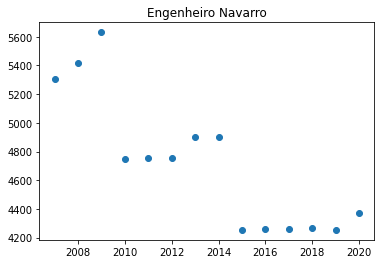

[ 5.99107143e+00 -2.42241919e+04  2.44911372e+07]
       2
5.991 x - 2.422e+04 x + 2.449e+07


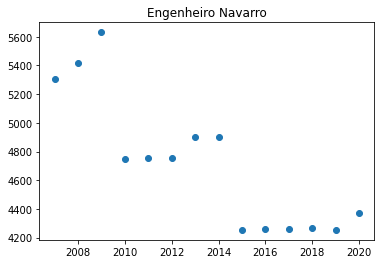

4237.453571442515


In [15]:
from numpy import poly1d


x = data_mun["ano"]
y = data_mun["ag001"]

plt.scatter(x,y,)
plt.title(nome_mun)
plt.show()

curve = np.polyfit(x,y,2)
poly = poly1d(curve)

print(curve)
print(poly)
plt.scatter(x,y)
plt.title(nome_mun)
plt.show()
print(poly(2020))
 



In [82]:
from pyparsing import col


bd = base_de_dados
bd.head()
municipios = base_de_dados["mun"].unique()
#municipios = ["Botumirim","Bocaiúva", "Águas Vermelhas"]

projecao = pd.DataFrame(columns=["cod_mun","mun","ag001","pop_proj","diff", "percent", "poly"])


ano = 2020
 
for i in municipios:
    #print(i)
    data_mun = bd[bd["mun"]== i]

    x = data_mun["ano"]
    y = data_mun["ag001"]

    ag001_2020 = data_mun.iloc[1]["ag001"]
    
    #print(ag001_2020)
    data_mun.drop(data_mun[data_mun.ano == 2020].index)
    curve = np.polyfit(x,y,2)
    poly = poly1d(curve)

    #print(poly)

    cod_mun = data_mun["cod_mun"].unique()
    
    
    pop_proj = poly(ano)
    #print(pop_proj)
   
    difenca = round(pop_proj) - ag001_2020
    percent = difenca/ag001_2020

   
    projecao.loc[len(projecao)] = [cod_mun, i, ag001_2020, round(pop_proj), difenca, percent, curve]

projecao["percent"] = projecao["percent"].astype(float).map("{:.2%}".format)
projecao.to_excel("projecao_muinicipios.xlsx")
projecao.head

<bound method NDFrame.head of      cod_mun                         mun  ag001  pop_proj  diff percent  \
0   [310100]             Águas Vermelhas   9515      9788   273   2.87%   
1   [310665]                     Berizal   2684      2738    54   2.01%   
2   [310730]                    Bocaiúva  45870     45525  -345  -0.75%   
3   [310825]             Bonito de Minas   2501      2530    29   1.16%   
4   [310850]                   Botumirim   3375      3424    49   1.45%   
..       ...                         ...    ...       ...   ...     ...   
71  [317052]                     Urucuia   6384      6348   -36  -0.56%   
72  [317065]  Vargem Grande do Rio Pardo   2561      2556    -5  -0.20%   
73  [317080]             Várzea da Palma  29858     29879    21   0.07%   
74  [317090]                 Varzelândia   8999      9309   310   3.44%   
75  [317103]                 Verdelândia   4735      4905   170   3.59%   

                                                 poly  
0   [28.47596

In [83]:
bd.head()

,cod_mun,mun,ano,pop_tot,pop_urb,ag001,ag026,in023,in055
0,310100,Águas Vermelhas,2020,13599,9557,9541,9541,99.8,70.16
1,310100,Águas Vermelhas,2019,13539,9515,9515,9515,100.0,70.28
2,310100,Águas Vermelhas,2018,13477,9472,9472,9472,100.0,70.28
3,310100,Águas Vermelhas,2017,13576,9541,9541,9541,100.0,70.28
4,310100,Águas Vermelhas,2016,13513,9497,9497,9497,100.0,70.28
